<a href="https://colab.research.google.com/github/Lotfullah21/Deep-Learning/blob/main/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np
time_steps = 100
input_features = 32
output_features = 64
successive_outputs = []
inputs = np.random.random((time_steps, input_features))
state_t = np.zeros((output_features,))
W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features,))
for input_t in inputs:
  output_t = np.tanh(np.dot(W,input_t)+np.dot(U, state_t)+b)
  successive_outputs.append(output_t)
  state_t = output_t
final_output = np.concatenate(successive_outputs,axis=0)


In [23]:
import numpy as np
timesteps = 100
input_features = 32
output_features = 64

inputs = np.random.random((timesteps, input_features))
state_t = np.zeros((output_features,))
W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features,))

successive_outputs = []
for input_t in inputs:   
    output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
    successive_outputs.append(output_t)
    state_t = output_t
final_output_sequence = np.concatenate(successive_outputs, axis=0)


In [24]:
# Keras
from keras.models import Sequential 
from keras.layers import Embedding, SimpleRNN
model = Sequential()

In [25]:
model.add(Embedding(10000,32))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_15 (SimpleRNN)   (None, 32)                2080      
                                                                 
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [26]:
model = Sequential()
model.add(Embedding(10000,32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_16 (SimpleRNN)   (None, None, 32)          2080      
                                                                 
 simple_rnn_17 (SimpleRNN)   (None, None, 32)          2080      
                                                                 
 simple_rnn_18 (SimpleRNN)   (None, None, 32)          2080      
                                                                 
 simple_rnn_19 (SimpleRNN)   (None, None, 32)          2080      
                                                                 
 simple_rnn_20 (SimpleRNN)   (None, None, 32)          2080      
                                                                 
 simple_rnn_21 (SimpleRNN)   (None, None, 32)         

In [27]:
model = Sequential()
model.add(Embedding(10000,32))

model.add(SimpleRNN(32, return_sequences=True))
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_22 (SimpleRNN)   (None, None, 32)          2080      
                                                                 
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


## Let's use such a model on the IMBD movie-review-classification problem, First preprocess the data

In [28]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
maxlen = 1000
batch_size = 32
print("loading data ....")

(train_data, train_labels),(test_data, test_labels) = imdb.load_data(num_words=max_features)

print(len(train_data),"train sequence")
print(len(test_data),"test sequence")

print("pad sequences (sample x time)")
train_data = sequence.pad_sequences(train_data, maxlen = maxlen)
test_data = sequence.pad_sequences(test_data, maxlen = maxlen)
print("train data shape",train_data.shape)
print("test data shape",test_data.shape)



loading data ....
25000 train sequence
25000 test sequence
pad sequences (sample x time)
train data shape (25000, 1000)
test data shape (25000, 1000)


## Training the model with Embedding and simple RNN


In [29]:
from keras.layers import Dense
model = Sequential()
model.add(Embedding(max_features,32))
model.add(SimpleRNN(32))
model.add(Dense(1,activation = "sigmoid"))
model.compile(optimizer = 'rmsprop', loss = "binary_crossentropy", metrics = ['acc'])
history = model.fit(train_data, train_labels,epochs = 10, batch_size = 128, validation_split = 0.2)

Epoch 1/10
157/157 [==============================] - 56s 351ms/step - loss: 0.6272 - acc: 0.6295 - val_loss: 0.4639 - val_acc: 0.7934
Epoch 2/10
157/157 [==============================] - 55s 350ms/step - loss: 0.3825 - acc: 0.8400 - val_loss: 0.3792 - val_acc: 0.8414
Epoch 3/10
157/157 [==============================] - 54s 343ms/step - loss: 0.2843 - acc: 0.8881 - val_loss: 0.3639 - val_acc: 0.8530
Epoch 4/10
157/157 [==============================] - 55s 349ms/step - loss: 0.2239 - acc: 0.9150 - val_loss: 0.3760 - val_acc: 0.8596
Epoch 5/10
157/157 [==============================] - 63s 401ms/step - loss: 0.1590 - acc: 0.9412 - val_loss: 0.4416 - val_acc: 0.8158
Epoch 6/10
157/157 [==============================] - 67s 430ms/step - loss: 0.1085 - acc: 0.9631 - val_loss: 0.4317 - val_acc: 0.8472
Epoch 7/10
157/157 [==============================] - 70s 446ms/step - loss: 0.0781 - acc: 0.9754 - val_loss: 0.5156 - val_acc: 0.8220
Epoch 8/10
157/157 [==============================] - 5

<Figure size 432x288 with 0 Axes>

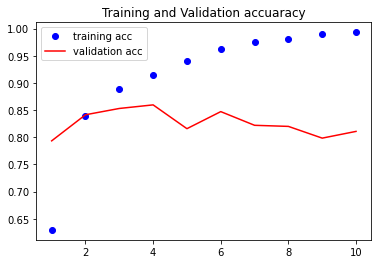

<Figure size 432x288 with 0 Axes>

In [30]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc)+1)
plt.plot(epochs, acc, 'bo', label = "training acc")
plt.plot(epochs, val_acc , 'b' , c = 'r', label = "validation acc")
plt.title("Training and Validation accuaracy")
plt.legend()
plt.figure()

<Figure size 432x288 with 0 Axes>

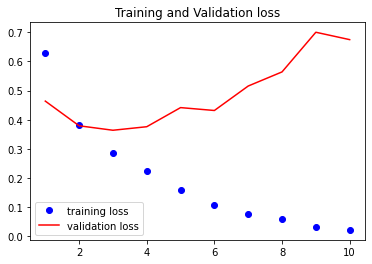

<Figure size 432x288 with 0 Axes>

In [31]:
plt.plot(epochs, loss, 'bo', label = "training loss")
plt.plot(epochs, val_loss , 'b' , c = 'r', label = "validation loss")
plt.title("Training and Validation loss")
plt.legend()
plt.figure()

## LSTM

In [32]:
from keras.layers import Dense
from keras.layers import LSTM
model = Sequential()
model.add(Embedding(max_features,32))
model.add(LSTM(32))
model.add(Dense(1,activation = "sigmoid"))

model.compile(optimizer = 'rmsprop', loss = "binary_crossentropy", metrics = ['acc'])
history = model.fit(train_data, train_labels,epochs = 10, batch_size = 128, validation_split = 0.2)

Epoch 1/10
157/157 [==============================] - 117s 732ms/step - loss: 0.5158 - acc: 0.7649 - val_loss: 0.3934 - val_acc: 0.8372
Epoch 2/10
157/157 [==============================] - 114s 729ms/step - loss: 0.2996 - acc: 0.8838 - val_loss: 0.2817 - val_acc: 0.8862
Epoch 3/10
157/157 [==============================] - 128s 817ms/step - loss: 0.2391 - acc: 0.9086 - val_loss: 0.2714 - val_acc: 0.8924
Epoch 4/10
157/157 [==============================] - 128s 812ms/step - loss: 0.2110 - acc: 0.9256 - val_loss: 0.3091 - val_acc: 0.8884
Epoch 5/10
157/157 [==============================] - 128s 814ms/step - loss: 0.1842 - acc: 0.9337 - val_loss: 0.2904 - val_acc: 0.8824
Epoch 6/10
157/157 [==============================] - 128s 816ms/step - loss: 0.1612 - acc: 0.9437 - val_loss: 1.2519 - val_acc: 0.6816
Epoch 7/10
157/157 [==============================] - 130s 826ms/step - loss: 0.1559 - acc: 0.9472 - val_loss: 0.3662 - val_acc: 0.8758
Epoch 8/10
157/157 [============================

<Figure size 432x288 with 0 Axes>

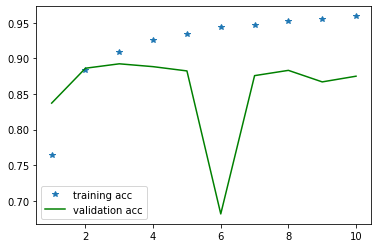

<Figure size 432x288 with 0 Axes>

In [35]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc)+1)
plt.plot(epochs, acc, '*', label = "training acc")
plt.plot(epochs, val_acc , 'b' , color = 'green', label = "validation acc")

plt.legend()
plt.figure()

<Figure size 432x288 with 0 Axes>

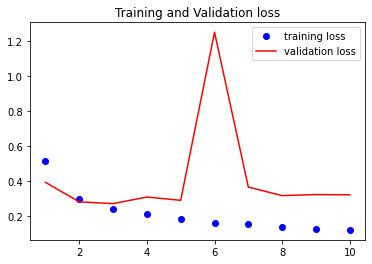

<Figure size 432x288 with 0 Axes>

In [36]:
plt.title("Training and Validation loss")
plt.plot(epochs, loss, 'bo', label = "training loss")
plt.plot(epochs, val_loss , 'b' , c = 'r', label = "validation loss")
plt.title("Training and Validation loss")
plt.legend()
plt.figure()

In [43]:
import os
data_dir = '/users/Lotfullah Andishmand/Downloads/climate'
fname = os.path.join(data_dir, 'jena_climate_2009_2016.csv')
f = open(fname)
data = f.read()
f.close()
lines = data.split('\n')
header = lines[0].split(',')
lines = lines[1:]
print(header)
print(len(lines))

FileNotFoundError: ignored

In [48]:
import os
import pandas as pd
data_dir = '/users/Lotfullah Andishmand/Downloads/jena_climate'
fname = os.path.join(data_dir, 'jena_climate_2009_2016.csv')
# f = open(fname)
data = pd.read_csv("jena_climate_2009_2016.csv")